# Exercises XP Gold: W4_D1

### What you will create

- Calculation sheets for metrics like **Accuracy**, **Precision**, **Recall**, and **F1-Score** based on given confusion matrix values.  
- Strategic proposals that address specific challenges posed by these issues.  
- Frameworks for evaluating classification models in different scenarios, especially focusing on the impact of class imbalance and the role of threshold tuning.

---

### What you will learn

- Understand and interpret the **confusion matrix** in different scenarios.  
- Understand the trade-offs between different **evaluation metrics**.  
- Explore the concepts of **cross-validation** and **learning curves**.

---

## Exercises

### **Exercise 1 — Analyzing Confusion Matrix**
Imagine you have a dataset for a binary classification problem, such as email spam detection, where emails are classified as either ‘Spam’ or ‘Not Spam’. You are provided with the confusion matrix results of a classifier.

1. Define in your own words what **True Positives**, **True Negatives**, **False Positives**, and **False Negatives** mean in the context of this problem.  
2. Given a confusion matrix with specific values for **TP**, **TN**, **FP**, **FN**, calculate **Accuracy**, **Precision**, **Recall**, and **F1-Score**.  
3. Discuss how the classifier’s performance would change with a higher number of **False Positives** compared to **False Negatives**, and vice versa.

---

### **Exercise 2 — Evaluating Trade-offs in Metrics**
Consider a medical diagnosis application where a model predicts whether patients have a certain disease.

1. Explain why **high recall** is more important than **high precision** in this context.  
2. Describe a scenario where **precision** becomes more important than **recall**.  
3. Discuss the potential consequences of focusing solely on **accuracy** in imbalanced datasets.

---

### **Exercise 3 — Understanding Cross-Validation and Learning Curves**
You are working on a project with a large dataset that involves predicting housing prices based on various features.

1. Explain the difference between **K-Fold Cross-Validation** and **Stratified K-Fold Cross-Validation**. Which one would you choose for this task and why?  
2. Describe what **learning curves** are and how they can help in understanding the performance of your model.  
3. Discuss the implications of **underfitting** and **overfitting** as observed from learning curves, and how you might address these issues.

---

### **Exercise 4 — Impact of Class Imbalance on Model Evaluation**
Imagine you are working on a dataset for detecting a rare disease where only 2% of the instances are positive cases.

1. Explain why using **accuracy** as an evaluation metric might be misleading in this scenario.  
2. Discuss the importance of **precision** and **recall** in the context of this imbalanced dataset.  
3. Propose strategies you could use to more effectively evaluate and improve the model’s performance in this scenario.

---

### **Exercise 5 — Role of Threshold Tuning in Classification Models**
You are evaluating a binary classification model that predicts whether a bank’s client will default on a loan. The model outputs a probability score between 0 and 1.

1. Describe how changing the threshold for classifying a positive case (default) from **0.5** to **0.7** might affect the model’s **precision** and **recall**.  
2. Discuss the potential consequences of setting the threshold too high or too low in the context of loan default prediction.  
3. Explain how **ROC curves** and **AUC** can assist in finding the optimal threshold.

## Exercise 1 : Analyzing Confusion Matrix

### Exercise 1 — Analyzing a Confusion Matrix (Spam Detection)

### 1) Define TP, TN, FP, FN (in the context of email spam)

- **True Positive (TP):** A spam email correctly predicted as *Spam*.  
- **True Negative (TN):** A legitimate email correctly predicted as *Not Spam*.  
- **False Positive (FP):** A legitimate email incorrectly predicted as *Spam* (a “ham” email sent to spam).  
- **False Negative (FN):** A spam email incorrectly predicted as *Not Spam* (spam that slips through).

---

### 2) Metric formulas

Given counts TP, TN, FP, FN:

- **Accuracy:** \(\frac{TP + TN}{TP + TN + FP + FN}\)  
- **Precision (Positive Predictive Value):** \(\frac{TP}{TP + FP}\)  
- **Recall (Sensitivity / True Positive Rate):** \(\frac{TP}{TP + FN}\)  
- **F1-Score:** \(2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}\)

> **Intuition:**
> - **Precision** answers: “Of emails marked *Spam*, how many truly are spam?”  
> - **Recall** answers: “Of all actual spam emails, how many did we catch?”

---

### 3) Discussion: Higher FP vs Higher FN

- **More False Positives (FP ↑):**  
  - More legitimate emails get mislabeled as spam → users miss important messages.  
  - **Precision decreases**.  
  - User trust can drop; people may need to check the spam folder often.

- **More False Negatives (FN ↑):**  
  - More spam lands in the inbox → users see more junk/phishing.  
  - **Recall decreases**.  
  - Security/risk issues increase (phishing, scams) and user experience worsens.

---

### 4) (Optional) Metric comparison when FP↑ or FN↑
Below, a Python function is used to compare how metrics change when increasing FP or FN.

In [1]:
# 📌 Exercise 1 - Confusion Matrix Metrics (Spam Detection)

# --- Inputs: Confusion matrix counts ---
TP = 80  # True Positives
TN = 900 # True Negatives
FP = 50  # False Positives
FN = 20  # False Negatives

# --- Metric computations ---
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

# --- Display results ---
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")

Accuracy:  0.933
Precision: 0.615
Recall:    0.800
F1-Score:  0.696


In [2]:
# 🔬 Optional - Scenario comparison to see metric changes

def metrics(tp, tn, fp, fn):
    """Return Accuracy, Precision, Recall, F1 for given confusion matrix."""
    total = tp + tn + fp + fn
    acc = (tp + tn) / total if total > 0 else 0.0
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0.0
    return acc, prec, rec, f1

base = (80, 900, 50, 20)      # (TP, TN, FP, FN)
more_fp = (80, 900, 100, 20)  # Increase FP
more_fn = (80, 900, 50, 60)   # Increase FN

labels = ["Base", "More FP", "More FN"]
cases = [base, more_fp, more_fn]

for label, (tp, tn, fp, fn) in zip(labels, cases):
    acc, prec, rec, f1 = metrics(tp, tn, fp, fn)
    print(f"{label:7s} -> Acc: {acc:.3f} | Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f}")

Base    -> Acc: 0.933 | Prec: 0.615 | Rec: 0.800 | F1: 0.696
More FP -> Acc: 0.891 | Prec: 0.444 | Rec: 0.800 | F1: 0.571
More FN -> Acc: 0.899 | Prec: 0.615 | Rec: 0.571 | F1: 0.593


## Exercise 2 : Evaluating Trade-offs in Metrics

### 1) Why high recall is more important than high precision in a medical diagnosis context

In medical diagnosis (e.g., detecting a serious disease), **high recall** is crucial because:
- Recall measures the ability to detect actual positive cases.
- Missing a true positive (False Negative) can lead to a patient not receiving necessary treatment, which could be life-threatening.
- A False Positive may lead to additional testing, which is less harmful than missing the disease.

---

### 2) Scenario where precision is more important than recall

Example: Email spam detection or legal investigation
- **High precision** means that when the model predicts "positive," it is very likely to be correct.
- In legal investigations, accusing someone wrongly (False Positive) can have severe consequences.
- In spam filtering, a high precision ensures fewer legitimate emails are misclassified as spam.

---

### 3) Risks of focusing solely on accuracy in imbalanced datasets

- In imbalanced datasets, a model can achieve high accuracy by predicting the majority class all the time.
- Example: If only 1% of patients have a disease, predicting "No disease" for everyone yields 99% accuracy but fails completely in detecting the disease.
- **Accuracy alone** does not provide a complete picture; precision, recall, and F1-score are needed to properly evaluate performance.

---

### 4) Key takeaway

Different contexts require prioritizing different metrics:
- **High recall**: Safety-critical systems (medical, security, fraud detection).
- **High precision**: Systems where false alarms are very costly (legal, financial approval, important email filtering).
- **Balanced approach (F1)**: When both false positives and false negatives are costly.

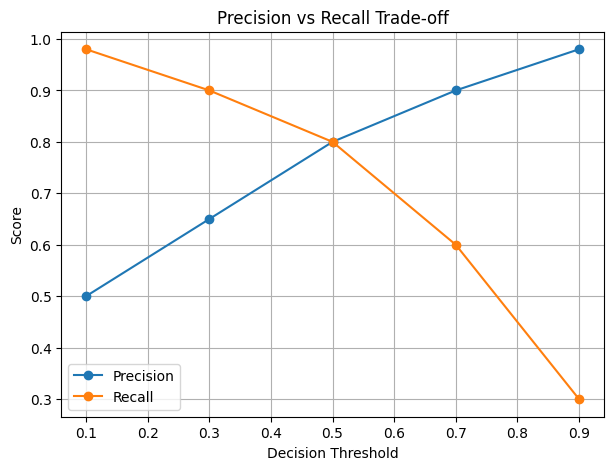

In [ ]:
# Precision vs Recall Trade-off Visualization

import matplotlib.pyplot as plt

# Simulated thresholds and corresponding precision/recall values
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
precision_values = [0.5, 0.65, 0.8, 0.9, 0.98]
recall_values = [0.98, 0.9, 0.8, 0.6, 0.3]

plt.figure(figsize=(7,5))
plt.plot(thresholds, precision_values, marker='o', label="Precision")
plt.plot(thresholds, recall_values, marker='o', label="Recall")

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall Trade-off")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 3 : Understanding Cross-Validation and Learning Curves

### 1) Difference between K-Fold and Stratified K-Fold Cross-Validation

- **K-Fold Cross-Validation**:
  - Splits the dataset into *k* equally sized folds.
  - Trains the model on (k-1) folds and tests it on the remaining fold.
  - Repeats this process *k* times, each time using a different fold for testing.
  - Useful for general performance estimation.

- **Stratified K-Fold Cross-Validation**:
  - Ensures each fold preserves the **class proportion** of the original dataset.
  - Very important for **classification with imbalanced datasets**.
  - Prevents cases where some folds have very few or no examples from a class.

**Choice for housing prices task**:
- Since housing price prediction is a **regression problem**, class imbalance is not an issue.
- **Regular K-Fold** is sufficient here.

---

### 2) Learning curves

- A **learning curve** shows model performance (training and validation scores) versus the size of the training dataset.
- Helps answer:
  - Is the model underfitting or overfitting?
  - Would more data improve performance?

---

### 3) Underfitting vs Overfitting on Learning Curves

- **Underfitting**:
  - Both training and validation scores are low.
  - Indicates the model is too simple or features are insufficient.
  - Possible fixes: increase model complexity, add relevant features.

- **Overfitting**:
  - Training score is high but validation score is low.
  - Model memorizes training data but fails to generalize.
  - Possible fixes: reduce model complexity, add regularization, get more data.

---

### 4) Key takeaway

- **K-Fold** → Good for general estimation.
- **Stratified K-Fold** → Best for classification with imbalanced classes.
- **Learning curves** → Identify whether more data or better regularization is needed.

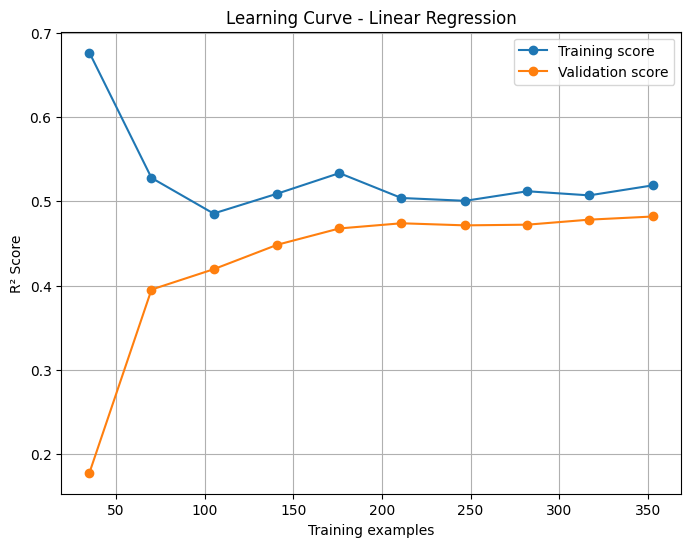

In [4]:
# Learning Curve Example

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Load regression dataset
X, y = load_diabetes(return_X_y=True)

# Define the model
model = LinearRegression()

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and std for each training size
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation score")

plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.title("Learning Curve - Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 4 : Impact of Class Imbalance on Model Evaluation

### 1) Why accuracy can be misleading

- In highly imbalanced datasets, the majority class dominates.
- A naive model that predicts **only the majority class** can achieve very high accuracy.
- Example: If only 2% of patients have a rare disease, predicting "No disease" for everyone yields **98% accuracy** — but fails completely at detecting the disease (Recall = 0).

---

### 2) Importance of Precision and Recall

- **Precision**: Measures how many of the predicted positive cases are truly positive.
- **Recall**: Measures how many actual positive cases were detected.
- In rare disease detection:
  - **High recall** is crucial → Missing a positive case (False Negative) can be life-threatening.
  - **High precision** is also important → To avoid unnecessary, costly, or stressful further testing.

---

### 3) Strategies for evaluating and improving performance

1. **Use metrics beyond accuracy**:
   - Precision, Recall, F1-score
   - Area Under the Precision-Recall Curve (PR AUC)
   - ROC AUC

2. **Data-level solutions**:
   - Oversampling the minority class (e.g., SMOTE)
   - Undersampling the majority class
   - Data augmentation

3. **Algorithm-level solutions**:
   - Use class weights to penalize mistakes on the minority class more heavily.
   - Choose algorithms that handle imbalance well (e.g., tree-based methods with `class_weight`).

---

### 4) Key takeaway

Accuracy alone is not reliable for imbalanced data.  
Combine **appropriate metrics** and **balancing strategies** to improve model performance.

In [5]:
# Class Imbalance Example

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Create imbalanced dataset (2% positives)
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
    weights=[0.98, 0.02], flip_y=0, random_state=42
)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train logistic regression without class weights
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Display metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 0.980
              precision    recall  f1-score   support

           0      0.980     1.000     0.990       293
           1      1.000     0.143     0.250         7

    accuracy                          0.980       300
   macro avg      0.990     0.571     0.620       300
weighted avg      0.980     0.980     0.973       300



## Exercise 5 : Role of Threshold Tuning in Classification Models

### 1) Effect of changing the classification threshold

- **Default threshold (0.5)**:  
  If predicted probability ≥ 0.5 → classify as positive.

- **Raising threshold (e.g., 0.7)**:
  - Fewer cases are classified as positive.
  - **Precision increases**: more predicted positives are truly positive.
  - **Recall decreases**: more actual positives are missed.

- **Lowering threshold (e.g., 0.3)**:
  - More cases are classified as positive.
  - **Recall increases**: more actual positives are detected.
  - **Precision decreases**: more false positives occur.

---

### 2) Risks of setting threshold too high or too low (loan default example)

- **Too high**:
  - Many defaults go undetected → financial loss for the bank.

- **Too low**:
  - Too many false alarms → rejecting good clients unnecessarily.

---

### 3) Using ROC curves and AUC to find optimal threshold

- **ROC curve**: Plots True Positive Rate (Recall) vs False Positive Rate.
- **AUC**: Area under ROC → measures model’s discrimination ability (1 = perfect, 0.5 = random).
- **Optimal threshold**: The point maximizing both Recall and Precision (trade-off).

---

### 4) Key takeaway

Threshold tuning allows you to adapt a classifier to the cost of errors in your specific context.

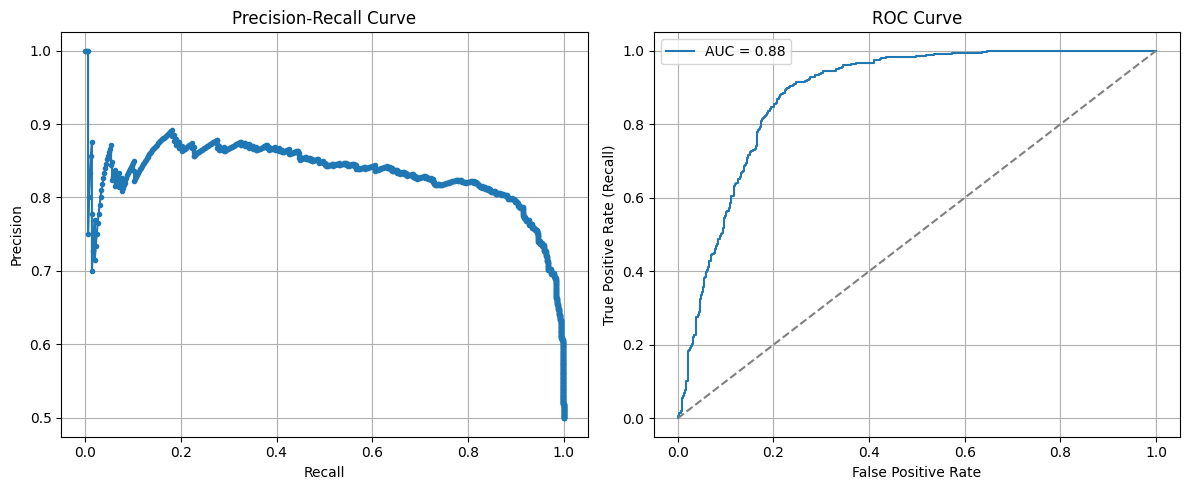

In [6]:
# Threshold Tuning Example

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Create a binary classification dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
    random_state=42
)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
y_scores = model.predict_proba(X)[:, 1]  # Probabilities for the positive class

# --- Precision-Recall Curve ---
precisions, recalls, thresholds_pr = precision_recall_curve(y, y_scores)

# --- ROC Curve ---
fpr, tpr, thresholds_roc = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# --- Plot ---
plt.figure(figsize=(12,5))

# Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recalls, precisions, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusions

Through these five exercises, we learned to:

1. **Interpret the confusion matrix** in various contexts and compute key metrics (Accuracy, Precision, Recall, F1-Score).  
2. **Understand trade-offs between metrics**:
   - High recall is essential in safety-critical contexts (e.g., medical diagnosis).
   - High precision is important when false positives are costly (e.g., legal decisions, fraud alerts).
3. **Apply cross-validation** to evaluate models more reliably and use **learning curves** to diagnose underfitting and overfitting.  
4. **Handle imbalanced datasets** by using appropriate metrics (Precision, Recall, F1, ROC AUC) and balancing techniques (oversampling, undersampling, class weights).  
5. **Adjust classification thresholds** to adapt the model to real-world costs of false positives vs false negatives, supported by ROC and Precision-Recall analysis.

**Key takeaway:**  
Evaluating a model requires more than looking at accuracy.  
Choosing the right metric, validation strategy, and threshold depends entirely on the business context and the cost of different types of errors.